# Cadence

A rhythm analysis toolkit, gathering multiple parsing engines:
* [Prosodic](https://github.com/quadrismegistus/prosodic) for fast English and Finnish metrical scansion.
* Cadence itself for slower but exhaustive, MaxEnt-able metrical scansion.

## Quickstart

### Install

#### 1. Install python package
```
# install from pypi
pip install -U cadences    # "cadence" was taken :-/

# or from github very latest
pip install -U git+https://github.com/quadrismegistus/cadence
```

#### 2. Insteall espeak (TTS)

Install espeak, free TTS software, to 'sound out' unknown words. See [here](http://espeak.sourceforge.net/download.html) for all downloads. For Mac or Linux, you can use:
```
apt-get install espeak     # linux
brew install espeak        # mac
```
If you're on mac and don't have brew installed, do so [here](https://brew.sh/).

In [1]:
# this should work following installation
import cadence as cd
!rm -rf {cd.PATH_DB}

### Load texts

In [2]:
sonnetXIV = """
How can I then return in happy plight,
That am debarred the benefit of rest?
When day’s oppression is not eased by night,
But day by night and night by day oppressed,
And each, though enemies to either’s reign,
Do in consent shake hands to torture me,
The one by toil, the other to complain
How far I toil, still farther off from thee.
I tell the day, to please him thou art bright,
And dost him grace when clouds do blot the heaven:
So flatter I the swart-complexiond night,
When sparkling stars twire not thou gildst the even.
But day doth daily draw my sorrows longer,
And night doth nightly make grief’s length seem stronger.
"""

In [3]:
# These are identical
sonnet = cd.Verse(sonnetXIV)
sonnet = cd.Text(sonnetXIV, linebreaks=True, phrasebreaks=False)

In [4]:
# Tokenize
sonnet.words()

word_ispunc
para_i sent_i sentpart_i line_i word_i word_str              
1      1      1          1      1      How                  0
                                2       can                 0
                                3       I                   0
                                4       then                0
                                5       return              0
...                                                       ...
       4      17         14     15      grief's             0
                                16      length              0
                                17      seem                0
                                18      stronger            0
                                19     .                    1

[135 rows x 1 columns]

In [5]:
# Syllabify
sonnet.sylls()

prom_strength  ...  word_nsyll
para_i sent_i sentpart_i line_i word_i word_str  word_tok word_ipa_i word_ipa   syll_i syll_str syll_ipa syll_stress syll_weight                 ...            
1      1      1          1      1      How       how      1          haʊ        1      How      haʊ      U           H                      NaN  ...           1
                                2       can      can      1          kæn        1      can      kæn      U           H                      NaN  ...           1
                                3       I        i        1          'aɪ        1      I        'aɪ      P           H                      1.0  ...           1
                                                          2          aɪ         1      I        aɪ       U           H                      0.0  ...           1
                                4       then     then     1          'ðɛn       1      then     'ðɛn     P           H                      1.0  ...           1
...                                                                                                                                         ...  ...         ...
       4      17         14     16      length   length   1          'lɛŋkθ     1      length   'lɛŋkθ   P           H                      NaN  ...           1
                                17      seem     seem     1          'siːm      1      seem     'siːm    P           H                      NaN  ...           1
                                18      stronger stronger 1          'strɔːŋ.ɛː 1      stron    'strɔːŋ  P           H                      1.0  ...           2
                                                                                2      ger      ɛː       U           L                      0.0  ...           2
                                19     .                  0                     0      .                 NaN         NaN                    NaN  ...           0

[186 rows x 6 columns]

In [6]:
# Syntax-parse
sonnet.syntax()

dep_head  dep_type  ... pos_xpos word_depth
para_i sent_i word_i word_str                      ...                    
1      1      1      How              5    advmod  ...      WRB          4
              2      can              5       aux  ...       MD          4
              3      I                5     nsubj  ...      PRP          5
              4      then             5    advmod  ...       RB          5
              5      return           0      root  ...       VB          5
...                                 ...       ...  ...      ...        ...
       4      15     grief's         16  compound  ...      NNS          8
              16     length          14       obj  ...       NN          8
              17     seem            14     xcomp  ...       VB         10
              18     stronger        17     xcomp  ...      JJR         12
              19     .                5     punct  ...        .          3

[135 rows x 18 columns]

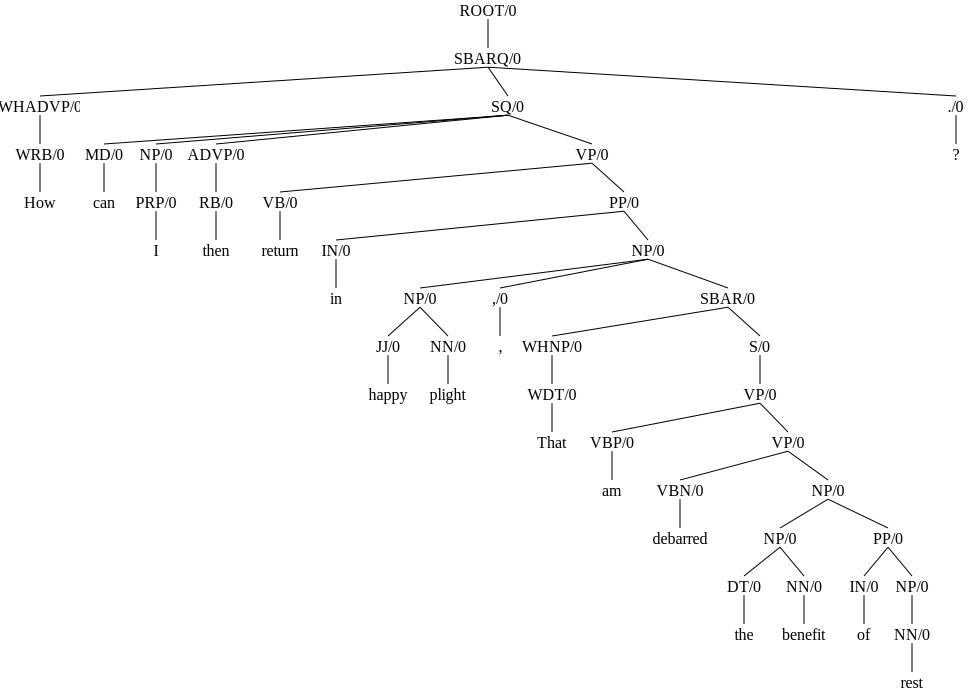

In [7]:
# Show sentences
sentence = sonnet.sent(1)
sentence.mtree()

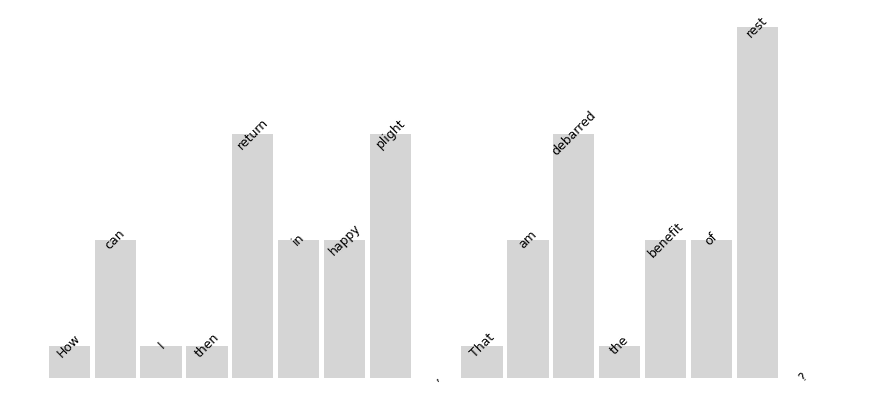

<ggplot: (742276690)>

In [8]:
# Stress grid of sentence inferred from syntactic tree
# using metricaltree
sentence.grid()

### Parse text

In [9]:
# Parse lines (verse)
sonnet.parse()

Metrically parsing line units:   0%|          | 0/14 [00:00<?, ?it/s]

 How can <u><b>I</b></u> <font style="color:darkred"><u><b>then</b></u></font> re<u><b>turn</b></u> in <u><b>hap</b></u>py <u><b>plight</b></u>,

 That <font style="color:darkred"><u>am</u></font> de<u><b>barred</b></u> the <u><b>be</b></u>ne<font style="color:darkred"><u>fit</u></font> of <u><b>rest</b></u>?

 When <u><b>day's</b></u> op<u><b>pres</b></u>sion <u><b>is</b></u> not <u><b>eased</b></u> by <u><b>night</b></u>,

 But <u><b>day</b></u> by <u><b>night</b></u> and <u><b>night</b></u> by <u><b>day</b></u> op<u><b>pressed</b></u>,

 And <u><b>each</b></u>, though <u><b>e</b></u>ne<font style="color:darkred"><u>mies</u></font> to <u><b>eit</b></u>her's <u><b>reign</b></u>,

 Do <u><b>in</b></u> con<u><b>sent</b></u> <font style="color:darkred"><b>shake</b></font> <u><b>hands</b></u> to <u><b>tor</b></u>ture <font style="color:darkred"><u>me</u></font>,

 The <font style="color:darkred"><u>one</u></font> by <u><b>toil</b></u>, the <u><b>ot</b></u>her <font style="color:darkred"><u>to</u></font> com<u><b>plain</b></u>

 How <u><b>far</b></u> I <u><b>toil</b></u>, <font style="color:darkred"><b>still</b></font> <u><b>fart</b></u>her <font style="color:darkred"><u>off</u></font> from thee.

 I <u><b>tell</b></u> the <u><b>day</b></u>, to <u><b>please</b></u> him thou <u><b>art</b></u> <font style="color:darkred"><b>bright</b></font>,

 And <u><b>dost</b></u> him <u><b>grace</b></u> when <u><b>clouds</b></u> do <u><b>blot</b></u> the <u><b>heaven</b></u>:

 So <u><b>flat</b></u>ter <u><b>I</b></u> the <u><b>swart</b></u>- com<u><b>ple</b></u>xiond <u><b>night</b></u>,

 When <u><b>spar</b></u>kling <u><b>stars</b></u> <font style="color:darkred"><u><b>twi</b></u></font>re <u><b>not</b></u> thou <u><b>gildst</b></u> the <u><b>e</b></u>ven.

 But <u><b>day</b></u> doth <u><b>dai</b></u>ly <u><b>draw</b></u> my <u><b>sor</b></u>rows <u><b>lon</b></u>ger,

 And <u><b>night</b></u> doth <u><b>nigh</b></u>tly <u><b>make</b></u> <font style="color:darkred"><b>grief's</b></font> <u><b>length</b></u> <font style="color:darkred"><b>seem</b></font> <u><b>stron</b></u>ger.

*total  ...  word_nsyll
para_i unit_i parse_rank is_troch parse_i parse       parse_str                                          sent_i sentpart_i line_i combo_i slot_i slot_meter syll_str_parse word_i word_str  word_tok word_ipa_i word_ipa   syll_i syll_str syll_ipa syll_stress syll_weight          ...            
1      1      1          0        1       wwSSwSwSwS  𝖧𝗈𝗐 𝖼𝖺𝗇 𝗜 𝙩𝙝𝙚𝙣 𝗋𝖾𝘁𝘂𝗿𝗻 𝗂𝗇 𝗵𝗮𝗽𝗉𝗒 𝗽𝗹𝗶𝗴𝗵𝘁,             1      1          1      1       1      w          𝖧𝗈𝗐            1      How       how      1          haʊ        1      How      haʊ      U           H               0.0  ...           1
                                                                                                                                          2      w          𝖼𝖺𝗇            2       can      can      1          kæn        1      can      kæn      U           H               0.0  ...           1
                                                                                                                                          3      s          𝗜              3       I        i        1          'aɪ        1      I        'aɪ      P           H               0.0  ...           1
                                                                                                                                          4      s          𝙩𝙝𝙚𝙣           4       then     then     1          'ðɛn       1      then     'ðɛn     P           H               1.0  ...           1
                                                                                                                                          5      w          𝗋𝖾             5       return   return   1          rɪ.'tɛːn   1      re       rɪ       U           L               0.0  ...           2
...                                                                                                                                                                                                                                                                             ...  ...         ...
       14     2          0        1       wSwSwSSwSSw 𝖠𝗇𝖽 𝗻𝗶𝗴𝗵𝘁 𝖽𝗈𝗍𝗁 𝗻𝗶𝗴𝗵𝗍𝗅𝗒 𝗺𝗮𝗸𝗲 𝙜𝙧𝙞𝙚𝙛'𝙨 𝘭𝘦𝘯𝘨𝘵𝘩 𝘀𝗲𝗲𝗺... 4      17         14     1       8      w          𝘭𝘦𝘯𝘨𝘵𝘩         16      length   length   1          'lɛŋkθ     1      length   'lɛŋkθ   P           H               1.0  ...           1
                                                                                                                                          9      s          𝘀𝗲𝗲𝗺           17      seem     seem     1          'siːm      1      seem     'siːm    P           H               0.0  ...           1
                                                                                                                                          10     s          𝙨𝙩𝙧𝙤𝙣          18      stronger stronger 1          'strɔːŋ.ɛː 1      stron    'strɔːŋ  P           H               1.0  ...           2
                                                                                                                                          11     w          𝗀𝖾𝗋            18      stronger stronger 1          'strɔːŋ.ɛː 2      ger      ɛː       U           L               0.0  ...           2
                                                                                                                                          12     NaN        .              19     .                  0                     0      .                 NaN         NaN             0.0  ...           0

[303 rows x 36 columns]

## Prose

In [10]:
melville="""Is it that by its indefiniteness it shadows forth the heartless voids
and immensities of the universe, and thus stabs us from behind with the thought of annihilation,
when beholding the white depths of the milky way? Or is it, that as in essence
whiteness is not so much a colour as the visible absence of colour; and at the same time the concrete of all colours;
is it for these reasons that there is such a dumb blankness, full of meaning,
in a wide landscape of snows: a colourless, all-colour of atheism from which we shrink?"""

In [11]:
# So are these
text = cd.Text(melville, linebreaks=False, phrasebreaks=True)
text = cd.Prose(melville)

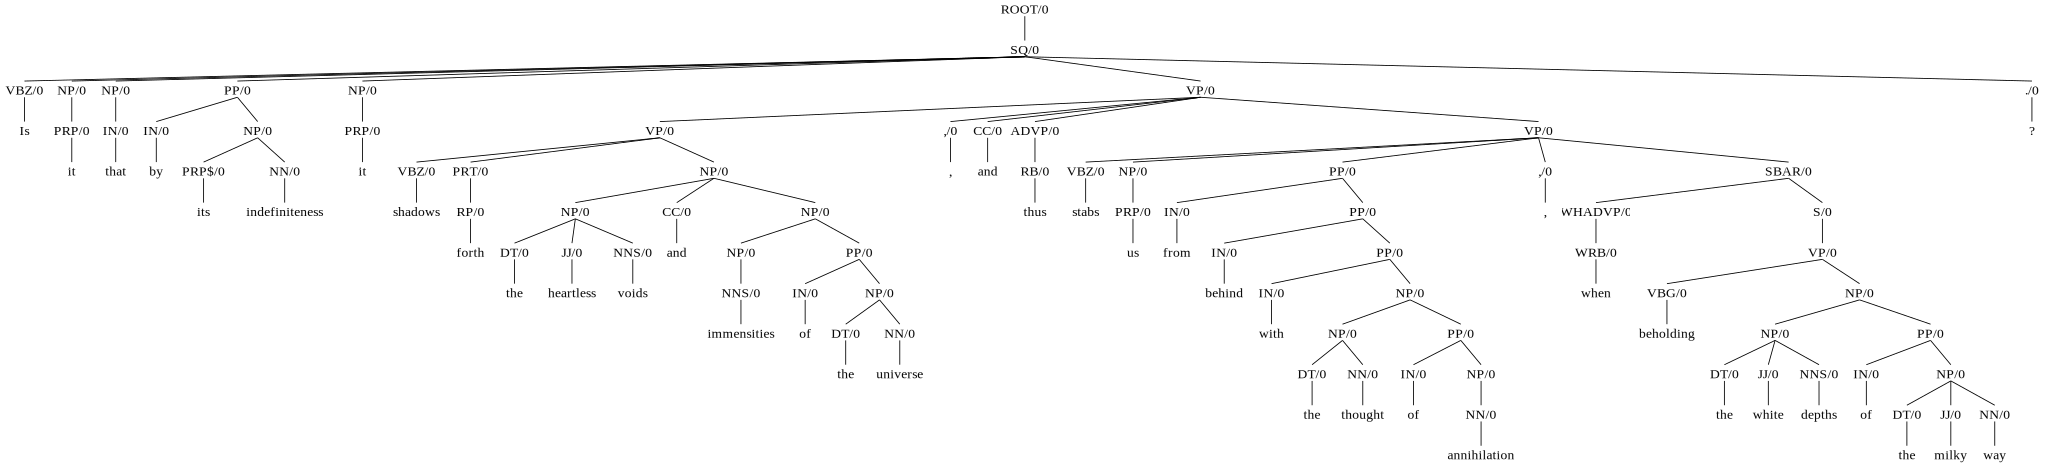

In [12]:
text.sent(1).mtree()

In [13]:
text.parse()

Metrically parsing line units:   0%|          | 0/14 [00:00<?, ?it/s]

 Is <u><b>it</b></u> that by <font style="color:darkred"><u>its</u></font> in<u><b>de</b></u>fi<font style="color:darkred"><u>ni</u></font>teness <font style="color:darkred">it</font> <u><b>sha</b></u><u><b>dows</b></u> <font style="color:darkred"><b>forth</b></font>

 the <u><b>hear</b></u>tless <u><b>voids</b></u> and <font style="color:darkred">im</font><u><b>men</b></u>si<font style="color:darkred"><u>ties</u></font> of the <u><b>u</b></u>ni<u><b>verse</b></u>,

 and <u><b>thus</b></u>

 <u><b>stabs</b></u> us <font style="color:darkred"><u>from</u></font> be<u><b>hind</b></u> with the <u><b>thought</b></u> of <font style="color:darkred">an</font><u><b>ni</b></u>hi<u><b>la</b></u>tion,

 <u><b>when</b></u> be<u><b>hol</b></u>ding <font style="color:darkred">the</font> <u><b>white</b></u> <font style="color:darkred"><u><b>depths</b></u></font> of the <u><b>mil</b></u>ky <u><b>way</b></u>?

 Or <u><b>is</b></u> it,

 <u><b>that</b></u> as in <u><b>es</b></u>sence <u><b>whi</b></u>teness <u><b>is</b></u> not so

 much a <u><b>co</b></u>lour <font style="color:darkred"><u>as</u></font> the <u><b>vi</b></u>si<font style="color:darkred">ble</font> <u><b>a</b></u>bsence <font style="color:darkred">of</font> <u><b>co</b></u>lour;

 and <u><b>at</b></u> the <u><b>same</b></u> <font style="color:darkred"><u><b>time</b></u></font> the <u><b>con</b></u>crete <font style="color:darkred"><u>of</u></font> all <u><b>co</b></u>lours;

 is <u><b>it</b></u> for these <u><b>rea</b></u>sons <u><b>that</b></u> there <u><b>is</b></u> such a <u><b>dumb</b></u> <font style="color:darkred"><u><b>blan</b></u></font>kness,

 <u><b>full</b></u> of <u><b>mea</b></u>ning,

 in a <u><b>wide</b></u> <font style="color:darkred"><b>lands</b></font><u><b>cape</b></u> of <u><b>snows</b></u>:

 a <u><b>co</b></u>lour<font style="color:darkred">less</font>,

 all- <u><b>co</b></u>lour <font style="color:darkred"><u>of</u></font> at<u><b>he</b></u>ism <font style="color:darkred">from</font> <u><b>which</b></u> we <u><b>shrink</b></u>?

*total  ...  word_nsyll
para_i unit_i parse_rank is_troch parse_i parse          parse_str                                         sent_i sentpart_i line_i combo_i slot_i slot_meter syll_str_parse word_i word_str word_tok word_ipa_i word_ipa syll_i syll_str syll_ipa syll_stress syll_weight          ...            
1      1      1          0        1       wSwwSwSwSwwSSw 𝖨𝗌 𝗶𝘁 𝗍𝗁𝖺𝗍 𝖻𝗒 𝙞𝙩𝙨 𝗂𝗇𝗱𝗲𝖿𝗂𝙣𝙞𝗍𝖾𝗇𝖾𝗌𝗌 𝘪𝘵 𝘀𝗵𝗮𝗱𝗼𝘄𝘀 𝘧𝘰𝘳𝘵𝘩 1      1          1      12      1      w          𝖨𝗌             1      Is       is       2          ɪz       1      Is       ɪz       U           H               0.0  ...           1
                                                                                                                                            2      s          𝗶𝘁             2       it      it       1          'ɪt      1      it       'ɪt      P           H               0.0  ...           1
                                                                                                                                            3      w          𝗍𝗁𝖺𝗍           3       that    that     2          ðət      1      that     ðət      U           H               0.0  ...           1
                                                                                                                                            4      w          𝖻𝗒             4       by      by       1          baɪ      1      by       baɪ      U           H               0.0  ...           1
                                                                                                                                            5      s          𝙞𝙩𝙨            5       its     its      1          ɪts      1      its      ɪts      U           H               1.0  ...           1
...                                                                                                                                                                                                                                                                            ...  ...         ...
       14     8          0        8       wSwwSwSwwSwS   𝖺𝗅𝗅- 𝗰𝗼𝗅𝗈𝗎𝗋 𝘰𝘧 𝗮𝘁𝗁𝖾𝗶𝗌𝗆 𝘧𝘳𝘰𝘮 𝘄𝗵𝗶𝗰𝗵 𝗐𝖾 𝘀𝗵𝗿𝗶𝗻𝗸?      2      11         6      14      10     w          𝘧𝘳𝘰𝘮           66      from    from     1          frʌm     1      from     frʌm     U           H               1.0  ...           1
                                                                                                                                            11     s          𝘄𝗵𝗶𝗰𝗵          67      which   which    1          'wɪʧ     1      which    'wɪʧ     P           H               0.0  ...           1
                                                                                                                                            12     w          𝗐𝖾             68      we      we       2          wiː      1      we       wiː      U           L               0.0  ...           1
                                                                                                                                            13     s          𝘀𝗵𝗿𝗶𝗻𝗸         69      shrink  shrink   1          'ʃrɪŋk   1      shrink   'ʃrɪŋk   P           H               0.0  ...           1
                                                                                                                                            14     NaN        ?              70     ?                 0                   0      ?                 NaN         NaN             0.0  ...           0

[1241 rows x 35 columns]